In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import KFold, StratifiedKFold
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
os.getcwd()

'C:\\Users\\Daniele\\PycharmProjects\\LipNetProve\\codesITA\\RATIO'

In [2]:
import os
os.chdir('../../DatasetITA-Ratio/Train')
os.getcwd()

'C:\\Users\\Daniele\\PycharmProjects\\LipNetProve\\DatasetITA-Ratio\\Train'

In [3]:
data=[]
for l in os.listdir():
    if '.DS_Store' not in l:
        os.chdir(l)
        for m in os.listdir():
            data.append([l+'/'+m, l])
        os.chdir('..')

In [4]:
data

[['a/ACC_Word_a_02.png', 'a'],
 ['a/ACC_Word_a_02_01.png', 'a'],
 ['a/ACC_Word_a_02_02.png', 'a'],
 ['a/ACC_Word_a_02_03.png', 'a'],
 ['a/AC_Word_a_01.png', 'a'],
 ['a/AC_Word_a_01_01.png', 'a'],
 ['a/AC_Word_a_01_02.png', 'a'],
 ['a/AC_Word_a_01_03.png', 'a'],
 ['a/AL_Word_a_03.png', 'a'],
 ['a/AL_Word_a_03_01.png', 'a'],
 ['a/AL_Word_a_03_02.png', 'a'],
 ['a/AL_Word_a_03_03.png', 'a'],
 ['a/AR_Word_a_10.png', 'a'],
 ['a/AR_Word_a_10_01.png', 'a'],
 ['a/AR_Word_a_10_02.png', 'a'],
 ['a/AR_Word_a_10_03.png', 'a'],
 ['a/AS_Word_a_12.png', 'a'],
 ['a/AS_Word_a_12_01.png', 'a'],
 ['a/AS_Word_a_12_02.png', 'a'],
 ['a/AS_Word_a_12_03.png', 'a'],
 ['a/BC_Word_a_06.png', 'a'],
 ['a/BC_Word_a_06_01.png', 'a'],
 ['a/BC_Word_a_06_02.png', 'a'],
 ['a/BC_Word_a_06_03.png', 'a'],
 ['a/BS_Word_a_07.png', 'a'],
 ['a/BS_Word_a_07_01.png', 'a'],
 ['a/BS_Word_a_07_02.png', 'a'],
 ['a/BS_Word_a_07_03.png', 'a'],
 ['a/CF_Word_a_11.png', 'a'],
 ['a/CF_Word_a_11_01.png', 'a'],
 ['a/CF_Word_a_11_02.png', 'a'

In [5]:
os.getcwd()

'C:\\Users\\Daniele\\PycharmProjects\\LipNetProve\\DatasetITA-Ratio\\Train'

In [6]:
len(data)

594

In [7]:
import csv
os.chdir('../../codesITA')
header = ['filename', 'label']

with open('training_labelsITA.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(data)

In [8]:
train_data = pd.read_csv('training_labelsITA.csv')
Y = train_data[['label']]

kf = KFold(n_splits = 5)

skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True)

In [9]:
idg = ImageDataGenerator(rescale=1./255)

In [10]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

In [11]:
def create_new_model():
    import os
    import numpy as np
    from keras.models import Sequential # To initialise the nn as a sequence of layers
    from keras.layers import Convolution2D # To make the convolution layer for 2D images
    from keras.layers import MaxPooling2D #
    from keras.layers import Flatten
    from keras.layers import Dense
    from keras.layers import Dropout
    from keras.callbacks import CSVLogger
    from tensorflow.keras.optimizers import RMSprop
    from keras.layers import BatchNormalization
    from tensorflow.keras.optimizers import Adam
    from keras.models import load_model
    from keras.callbacks import ModelCheckpoint
    from keras.layers import Activation
    from keras.layers import GlobalAveragePooling2D

    
    csv = CSVLogger("2_adam_20epochRatio.log")
    #filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
    #checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    # Initialising the CNN
    classifier = Sequential()

    # Step 1 - Convolution
    classifier.add(Convolution2D(32, (2, 2), input_shape=(224, 224, 1), activation='relu', strides=2, name='convo1'))
    #classifier.add(Convolution2D(64, (3, 3), activation='relu', name='convo2'))
    # Step 1 - Pooling
    classifier.add(MaxPooling2D(pool_size=(2, 2)))

    # Step 2 - Convolution
    classifier.add(Convolution2D(64, (3, 3), activation='relu', name='convo3'))
    # Step 2 - Pooling
    classifier.add(MaxPooling2D(pool_size=(2, 2)))
    # Step 3 - Convolution
    #classifier.add(Convolution2D(64, (3, 3), activation='relu', name='convo4'))
    # Step 3 - Pooling
    #classifier.add(MaxPooling2D(pool_size=(2, 2)))
    #Step 4 - Flattening

    classifier.add(Flatten())

    classifier.add(BatchNormalization())
    #classifier.add(Dropout((0.5)))
    classifier.add(Dense(512, activation='relu'))

    '''classifier.add(BatchNormalization())
    classifier.add(Dropout((0.5)))
    classifier.add(Dense(512, activation = 'relu'))
    '''

    classifier.add(BatchNormalization())
    #classifier.add(Dropout((0.4)))
    classifier.add(Dense(10, activation='softmax'))

    return classifier




Found 475 validated image filenames belonging to 10 classes.
Found 119 validated image filenames belonging to 10 classes.
Epoch 1/20
15/15 [==============================] - ETA: 0s - loss: 3.4690 - accuracy: 0.1116
Epoch 00001: val_accuracy improved from -inf to 0.10924, saving model to saved_models(30epoch)ITARATIO\model_1.h5
15/15 [==============================] - 6s 338ms/step - loss: 3.4690 - accuracy: 0.1116 - val_loss: 2.4177 - val_accuracy: 0.1092
Epoch 2/20
15/15 [==============================] - ETA: 0s - loss: 2.1835 - accuracy: 0.2211
Epoch 00002: val_accuracy improved from 0.10924 to 0.14286, saving model to saved_models(30epoch)ITARATIO\model_1.h5
15/15 [==============================] - 5s 322ms/step - loss: 2.1835 - accuracy: 0.2211 - val_loss: 2.2787 - val_accuracy: 0.1429
Epoch 3/20
15/15 [==============================] - ETA: 0s - loss: 1.8600 - accuracy: 0.3895
Epoch 00003: val_accuracy improved from 0.14286 to 0.16807, saving model to saved_models(30epoch)ITARAT

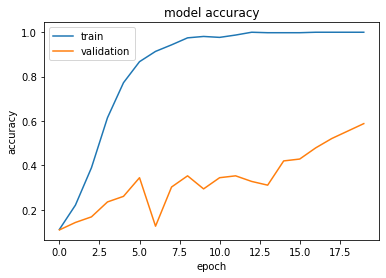

Found 475 validated image filenames belonging to 10 classes.
Found 119 validated image filenames belonging to 10 classes.
Epoch 1/20
15/15 [==============================] - ETA: 0s - loss: 3.0545 - accuracy: 0.1347
Epoch 00001: val_accuracy improved from -inf to 0.11765, saving model to saved_models(30epoch)ITARATIO\model_2.h5
15/15 [==============================] - 5s 321ms/step - loss: 3.0545 - accuracy: 0.1347 - val_loss: 2.2952 - val_accuracy: 0.1176
Epoch 2/20
15/15 [==============================] - ETA: 0s - loss: 2.0891 - accuracy: 0.2716
Epoch 00002: val_accuracy improved from 0.11765 to 0.12605, saving model to saved_models(30epoch)ITARATIO\model_2.h5
15/15 [==============================] - 4s 297ms/step - loss: 2.0891 - accuracy: 0.2716 - val_loss: 2.2716 - val_accuracy: 0.1261
Epoch 3/20
15/15 [==============================] - ETA: 0s - loss: 1.5669 - accuracy: 0.4716
Epoch 00003: val_accuracy improved from 0.12605 to 0.17647, saving model to saved_models(30epoch)ITARAT

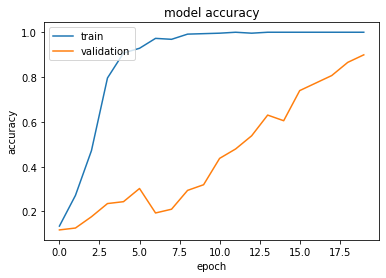

Found 475 validated image filenames belonging to 10 classes.
Found 119 validated image filenames belonging to 10 classes.
Epoch 1/20
15/15 [==============================] - ETA: 0s - loss: 3.5036 - accuracy: 0.1179
Epoch 00001: val_accuracy improved from -inf to 0.10084, saving model to saved_models(30epoch)ITARATIO\model_3.h5
15/15 [==============================] - 5s 312ms/step - loss: 3.5036 - accuracy: 0.1179 - val_loss: 2.3840 - val_accuracy: 0.1008
Epoch 2/20
15/15 [==============================] - ETA: 0s - loss: 2.2157 - accuracy: 0.2274
Epoch 00002: val_accuracy improved from 0.10084 to 0.15966, saving model to saved_models(30epoch)ITARATIO\model_3.h5
15/15 [==============================] - 5s 303ms/step - loss: 2.2157 - accuracy: 0.2274 - val_loss: 2.2853 - val_accuracy: 0.1597
Epoch 3/20
15/15 [==============================] - ETA: 0s - loss: 1.6714 - accuracy: 0.4737
Epoch 00003: val_accuracy did not improve from 0.15966
15/15 [==============================] - 4s 278m

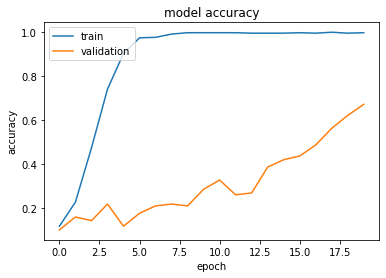

Found 475 validated image filenames belonging to 10 classes.
Found 119 validated image filenames belonging to 10 classes.
Epoch 1/20
15/15 [==============================] - ETA: 0s - loss: 2.9149 - accuracy: 0.1053
Epoch 00001: val_accuracy improved from -inf to 0.07563, saving model to saved_models(30epoch)ITARATIO\model_4.h5
15/15 [==============================] - 5s 320ms/step - loss: 2.9149 - accuracy: 0.1053 - val_loss: 2.4108 - val_accuracy: 0.0756
Epoch 2/20
15/15 [==============================] - ETA: 0s - loss: 2.2104 - accuracy: 0.2442
Epoch 00002: val_accuracy improved from 0.07563 to 0.12605, saving model to saved_models(30epoch)ITARATIO\model_4.h5
15/15 [==============================] - 5s 306ms/step - loss: 2.2104 - accuracy: 0.2442 - val_loss: 2.2789 - val_accuracy: 0.1261
Epoch 3/20
15/15 [==============================] - ETA: 0s - loss: 1.8556 - accuracy: 0.4042
Epoch 00003: val_accuracy improved from 0.12605 to 0.16807, saving model to saved_models(30epoch)ITARAT

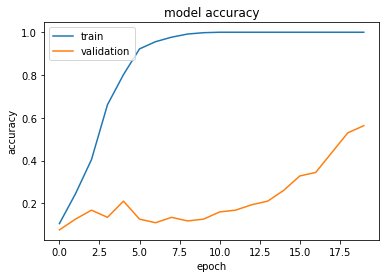

Found 476 validated image filenames belonging to 10 classes.
Found 118 validated image filenames belonging to 10 classes.
Epoch 1/20
15/15 [==============================] - ETA: 0s - loss: 3.7894 - accuracy: 0.1134
Epoch 00001: val_accuracy improved from -inf to 0.07627, saving model to saved_models(30epoch)ITARATIO\model_5.h5
15/15 [==============================] - 5s 314ms/step - loss: 3.7894 - accuracy: 0.1134 - val_loss: 2.4302 - val_accuracy: 0.0763
Epoch 2/20
15/15 [==============================] - ETA: 0s - loss: 2.2693 - accuracy: 0.2017
Epoch 00002: val_accuracy improved from 0.07627 to 0.16102, saving model to saved_models(30epoch)ITARATIO\model_5.h5
15/15 [==============================] - 5s 303ms/step - loss: 2.2693 - accuracy: 0.2017 - val_loss: 2.3030 - val_accuracy: 0.1610
Epoch 3/20
15/15 [==============================] - ETA: 0s - loss: 1.8798 - accuracy: 0.3971
Epoch 00003: val_accuracy did not improve from 0.16102
15/15 [==============================] - 4s 279m

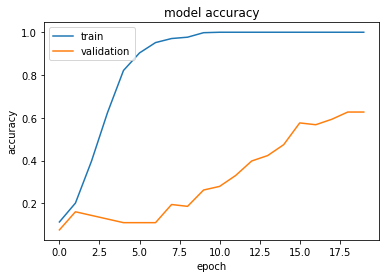

In [12]:
VALIDATION_ACCURACY = []
VALIDATION_LOSS = []

save_dir = 'saved_models(30epoch)ITARATIO/'
fold_var = 1

for train_index, val_index in skf.split(np.zeros(len(data)),Y):
    training_data = train_data.iloc[train_index]
    validation_data = train_data.iloc[val_index]

    train_data_generator = idg.flow_from_dataframe(training_data, directory = '../DatasetITA-Ratio/Train',
                               x_col = "filename", y_col = "label",
                               class_mode = "categorical", shuffle = True, color_mode="grayscale",target_size=(224,224),batchsize=32)
    valid_data_generator  = idg.flow_from_dataframe(validation_data, directory =  '../DatasetITA-Ratio/Train',
                            x_col = "filename", y_col = "label",
                            class_mode = "categorical", shuffle = True, color_mode="grayscale",target_size=(224,224),batchsize=32)

    # CREATE NEW MODEL
    model = create_new_model()
    # COMPILE NEW MODEL
    model.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

    # CREATE CALLBACKS
    checkpoint = tf.keras.callbacks.ModelCheckpoint(save_dir+get_model_name(fold_var),
                            monitor='val_accuracy', verbose=1,
                            save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    # There can be other callbacks, but just showing one because it involves the model name
    # This saves the best model
    # FIT THE MODEL
    h = model.fit(train_data_generator,
                epochs=20,
                callbacks=callbacks_list,
                validation_data=valid_data_generator)
    #PLOT HISTORY
    #:
    #:

    # LOAD BEST MODEL to evaluate the performance of the model
    model.load_weights("saved_models(30epoch)ITARATIO/model_"+str(fold_var)+".h5")
    

    results = model.evaluate(valid_data_generator)
    results = dict(zip(model.metrics_names,results))

    VALIDATION_ACCURACY.append(results['accuracy'])
    VALIDATION_LOSS.append(results['loss'])

    plt.plot(h.history['accuracy']) #validation
    plt.plot(h.history['val_accuracy']) #train
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    tf.keras.backend.clear_session()

    fold_var += 14,65 cm

In [13]:
VALIDATION_ACCURACY

[0.5882353186607361,
 0.8991596698760986,
 0.6722689270973206,
 0.5630252361297607,
 0.6271186470985413]

In [14]:
VALIDATION_LOSS

[1.6873555183410645,
 1.6230469942092896,
 1.842016339302063,
 1.7479889392852783,
 1.8358793258666992]